<a href="https://colab.research.google.com/github/haruhiysd/QM-Group-Project/blob/main/OLS_regression_analysis_FAILED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving merged_df_3.csv to merged_df_3.csv


In [2]:
import pandas as pd
df = pd.read_csv('merged_df_3.csv')
df.head()

,Autonomous_community,Period,Monthly_number_of_tourists,GDP_per_capita,Unemployment_rate,HPI,total_waste_capita,Total_mixed_waste,Total_waste_no_CDW_and_other,Yearly_tourist_numbers
0,01 Andalucía,2007-01-01,NaN,NaN,NaN,127.081,NaN,NaN,NaN,NaN
1,02 Aragón,2007-01-01,NaN,NaN,NaN,175.582,NaN,NaN,NaN,NaN
2,"03 Asturias, Principado de",2007-01-01,NaN,NaN,NaN,138.726,NaN,NaN,NaN,NaN
3,"04 Balears, Illes",2007-01-01,NaN,NaN,NaN,134.284,NaN,NaN,NaN,NaN
4,05 Canarias,2007-01-01,NaN,NaN,NaN,132.560,NaN,NaN,NaN,NaN


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

In [39]:
df['Monthly_number_of_tourists_millions'] = df['Monthly_number_of_tourists'] / 1000000
df['Total_mixed_waste_millions'] = df['Total_mixed_waste'] / 1000000
df['Yearly_tourist_numbers_millions'] = df['Yearly_tourist_numbers'] / 1000000

In [40]:
regression_df=df[df['Period']=='2018-01-01'].drop(['Period'],axis=1) # filter the whole dataset to 2018 and drop year column
regression_df = regression_df.drop(regression_df.index[-2:])
regression_df
#explain why you chose this year - before covid, last data for waste is 2022, not recovered yet to usual trajectory from covid

,Autonomous_community,Monthly_number_of_tourists,GDP_per_capita,Unemployment_rate,HPI,total_waste_capita,Total_mixed_waste,Total_waste_no_CDW_and_other,Yearly_tourist_numbers,Monthly_number_of_tourists(millions),Total_mixed_waste(millions),Yearly_tourist_numbers(millions),Monthly_number_of_tourists_millions,Total_mixed_waste_millions,Yearly_tourist_numbers_millions
1143,01 Andalucía,538026.0,19291.0,24.74,108.283,517.8,3908893.0,4345678.0,11681256.0,0.538026,3.908893,11.681256,0.538026,3.908893,11.681256
1144,02 Aragón,NaN,28281.0,11.58,107.505,441.4,499653.0,580807.0,545530.0,NaN,0.499653,0.545530,NaN,0.499653,0.545530
1145,"03 Asturias, Principado de",NaN,22651.0,15.02,104.140,477.2,403909.0,488480.0,299357.0,NaN,0.403909,0.299357,NaN,0.403909,0.299357
1146,"04 Balears, Illes",119437.0,28906.0,17.42,118.479,811.9,737515.0,932130.0,13851598.0,0.119437,0.737515,13.851598,0.119437,0.737515,13.851598
1147,05 Canarias,1183486.0,20853.0,20.62,111.167,606.3,1154154.0,1296935.0,13752022.0,1.183486,1.154154,13.752022,1.183486,1.154154,13.752022
1148,06 Cantabria,NaN,23818.0,12.46,109.851,528.5,270175.0,307162.0,381181.0,NaN,0.270175,0.381181,NaN,0.270175,0.381181
1149,07 Castilla y León,NaN,24216.0,13.91,104.579,444.6,932547.0,1070964.0,1374464.0,NaN,0.932547,1.374464,NaN,0.932547,1.374464
1150,08 Castilla - La Mancha,NaN,20811.0,20.68,102.378,472.0,859531.0,959238.0,235011.0,NaN,0.859531,0.235011,NaN,0.859531,0.235011
1151,09 Cataluña,864798.0,30525.0,12.19,122.514,451.0,2333741.0,3414327.0,19196344.0,0.864798,2.333741,19.196344,0.864798,2.333741,19.196344
1152,10 Comunitat Valenciana,450874.0,22723.0,17.13,107.643,496.9,2151275.0,2465654.0,9206908.0,0.450874,2.151275,9.206908,0.450874,2.151275,9.206908


In [41]:
#summary stats
summary=regression_df.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

,count,mean,std,min,25%,50%,75%,max
Monthly_number_of_tourists,6.0,615459.67,366125.25,119437.00,472189.75,537081.50,783105.00,1183486.00
GDP_per_capita,17.0,25479.06,4992.56,19291.00,21393.00,23818.00,28906.00,35601.00
Unemployment_rate,17.0,15.95,4.81,10.54,12.19,15.02,18.60,25.94
HPI,17.0,109.40,7.20,102.38,104.58,107.50,111.11,128.00
total_waste_capita,17.0,491.06,96.52,384.60,444.60,472.00,496.90,811.90
Total_mixed_waste,17.0,1073220.88,994206.80,111116.00,449254.00,737515.00,1154154.00,3908893.00
Total_waste_no_CDW_and_other,17.0,1304359.65,1186440.01,133973.00,508177.00,959238.00,1296935.00,4345678.00
Yearly_tourist_numbers,17.0,4870439.82,6261115.41,142926.00,381181.00,1374464.00,9206908.00,19196344.00
Monthly_number_of_tourists(millions),6.0,0.62,0.37,0.12,0.47,0.54,0.78,1.18
Total_mixed_waste(millions),17.0,1.07,0.99,0.11,0.45,0.74,1.15,3.91


In [42]:
#test for heteroscedascticity
#Linear regression assumes that the variance of residuals is the same for any value of x, and that residuals are normally distributed with a mean of 0.

Text(69.75, 0.5, 'Unemployment rate')

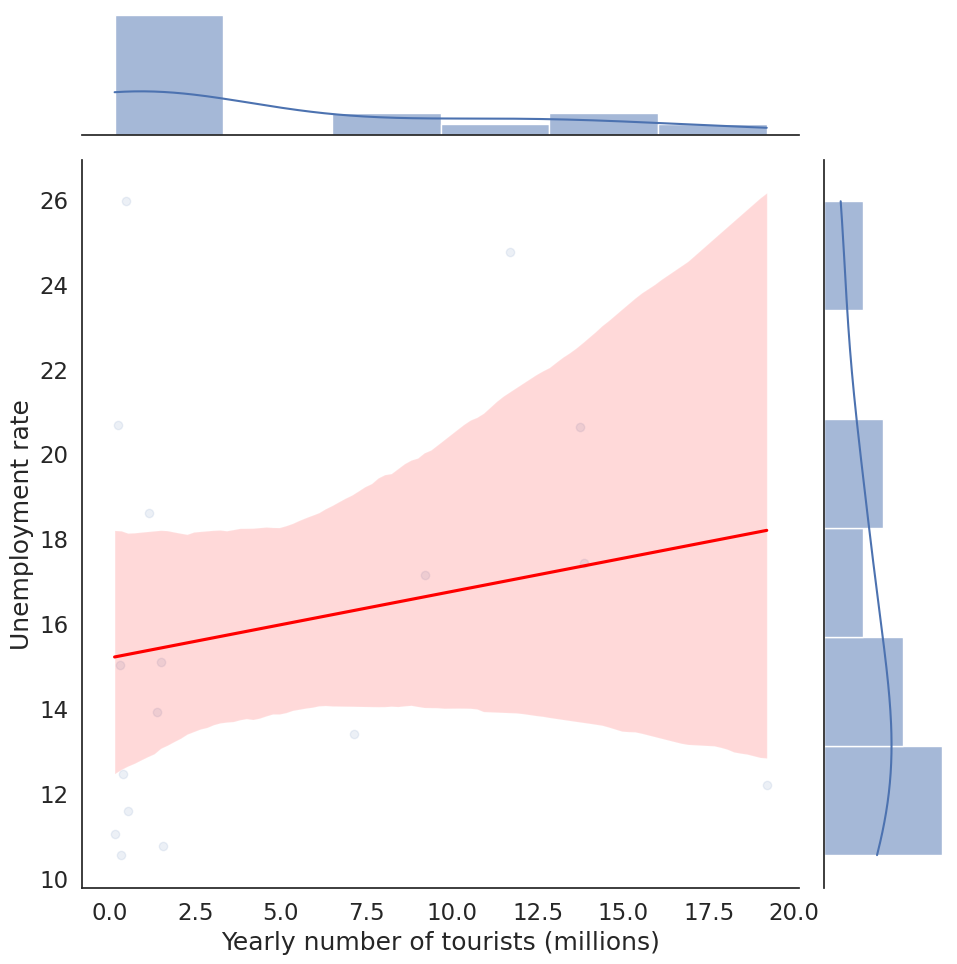

In [43]:
sns.jointplot(data=regression_df, # plot a scatterplot with a regression line and two histograms
                x='Yearly_tourist_numbers_millions', # set the x axis to be the years of schooling
                y='Unemployment_rate', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches

plt.xlabel('Yearly number of tourists (millions)') # add a label to the x axis
plt.ylabel('Unemployment rate') # add a label to the y axis

Text(69.75, 0.5, 'House Price Index')

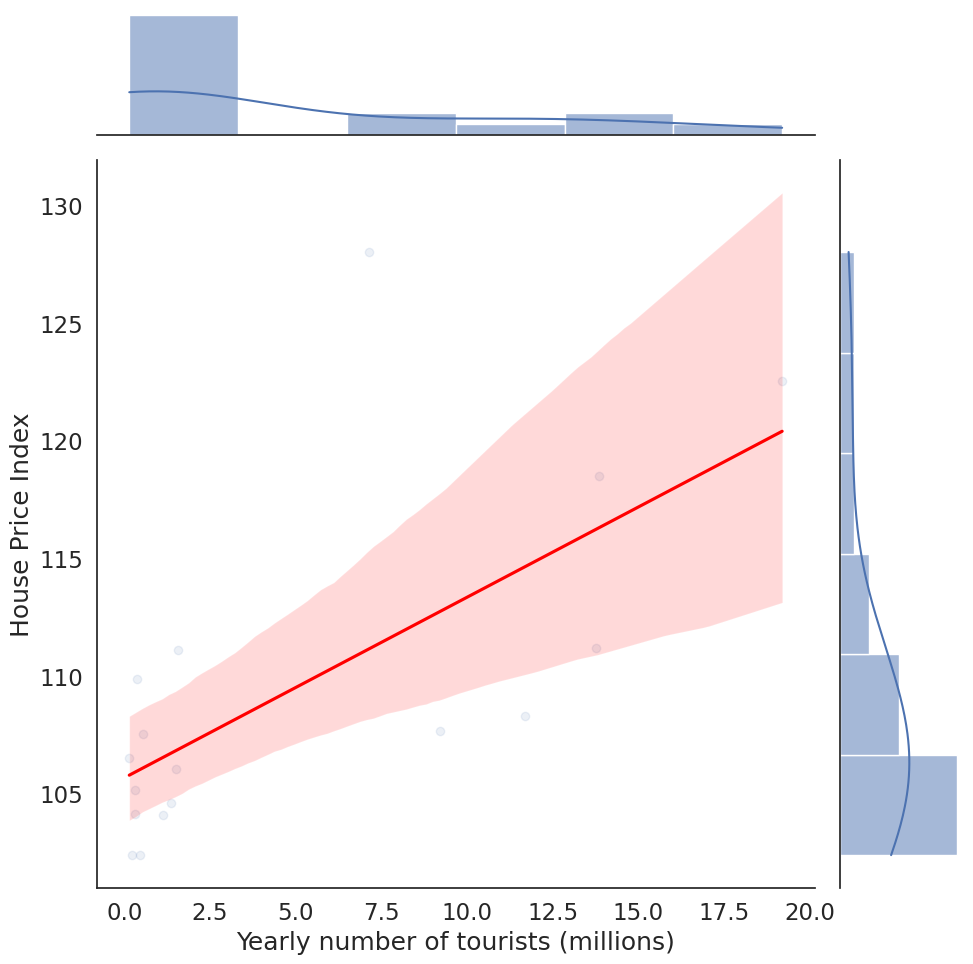

In [44]:
sns.jointplot(data=regression_df, # plot a scatterplot with a regression line and two histograms
                x='Yearly_tourist_numbers_millions', # set the x axis to be the years of schooling
                y='HPI', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches

plt.xlabel('Yearly number of tourists (millions)') # add a label to the x axis
plt.ylabel('House Price Index') # add a label to the y axis

Text(69.75, 0.5, 'Total mixed waste (millions)')

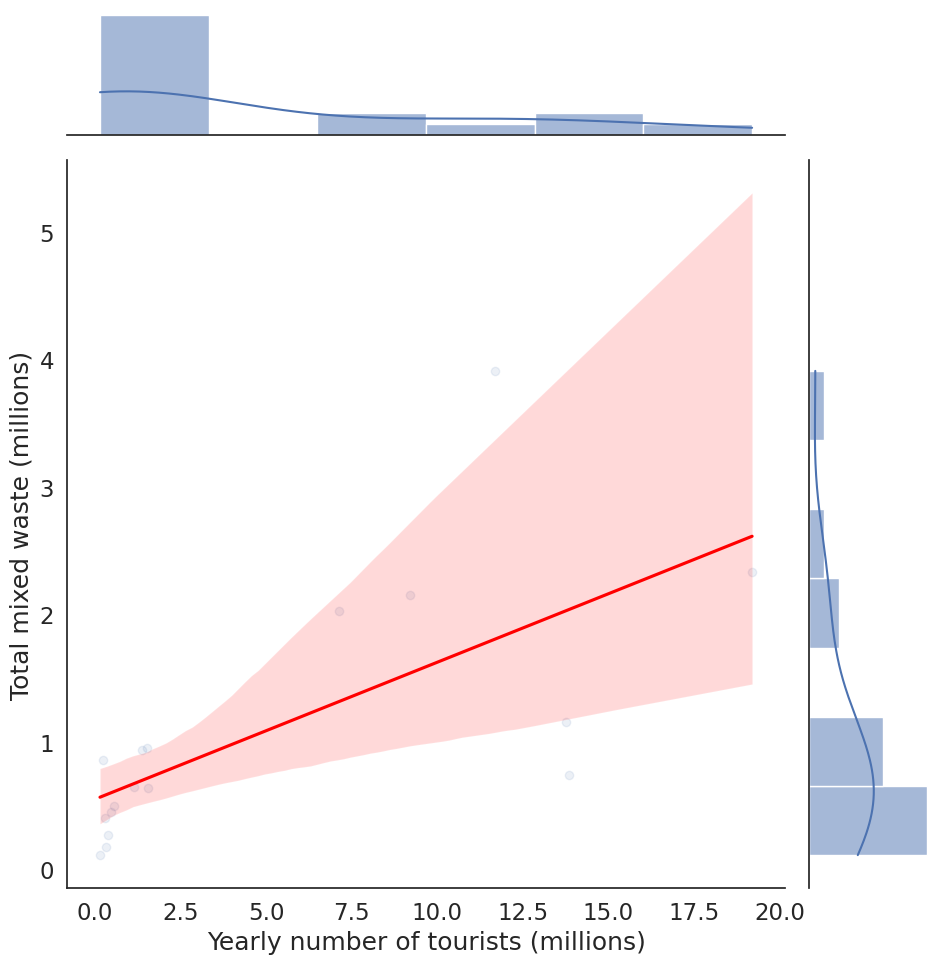

In [45]:
sns.jointplot(data=regression_df, # plot a scatterplot with a regression line and two histograms
                x='Yearly_tourist_numbers_millions', # set the x axis to be the years of schooling
                y='Total_mixed_waste_millions', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches

plt.xlabel('Yearly number of tourists (millions)') # add a label to the x axis
plt.ylabel('Total mixed waste (millions)') # add a label to the y axis

Text(69.75, 0.5, 'Waste per capita (kg)')

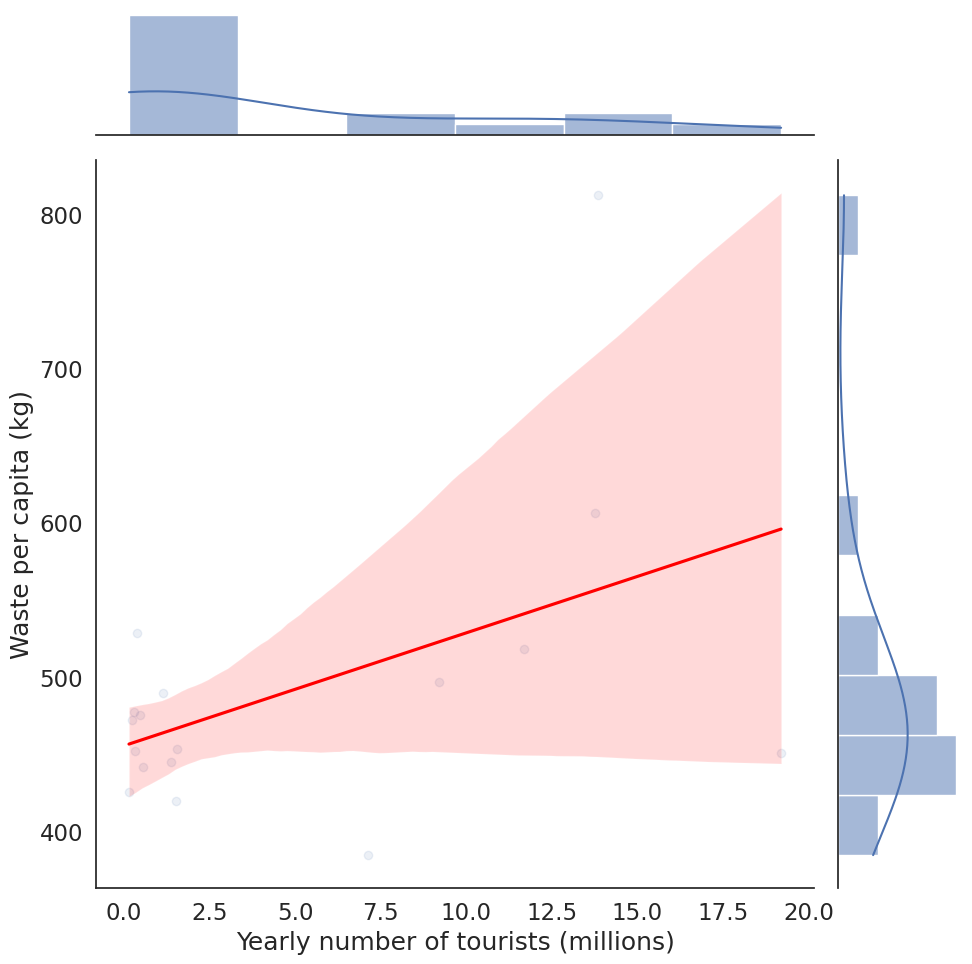

In [52]:
sns.jointplot(data=regression_df, # plot a scatterplot with a regression line and two histograms
                x='Yearly_tourist_numbers_millions', # set the x axis to be the years of schooling
                y='total_waste_capita', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches

plt.xlabel('Yearly number of tourists (millions)') # add a label to the x axis
plt.ylabel('Waste per capita (kg)') # add a label to the y axis

Text(0.5, 1.0, 'Correlation Matrix')

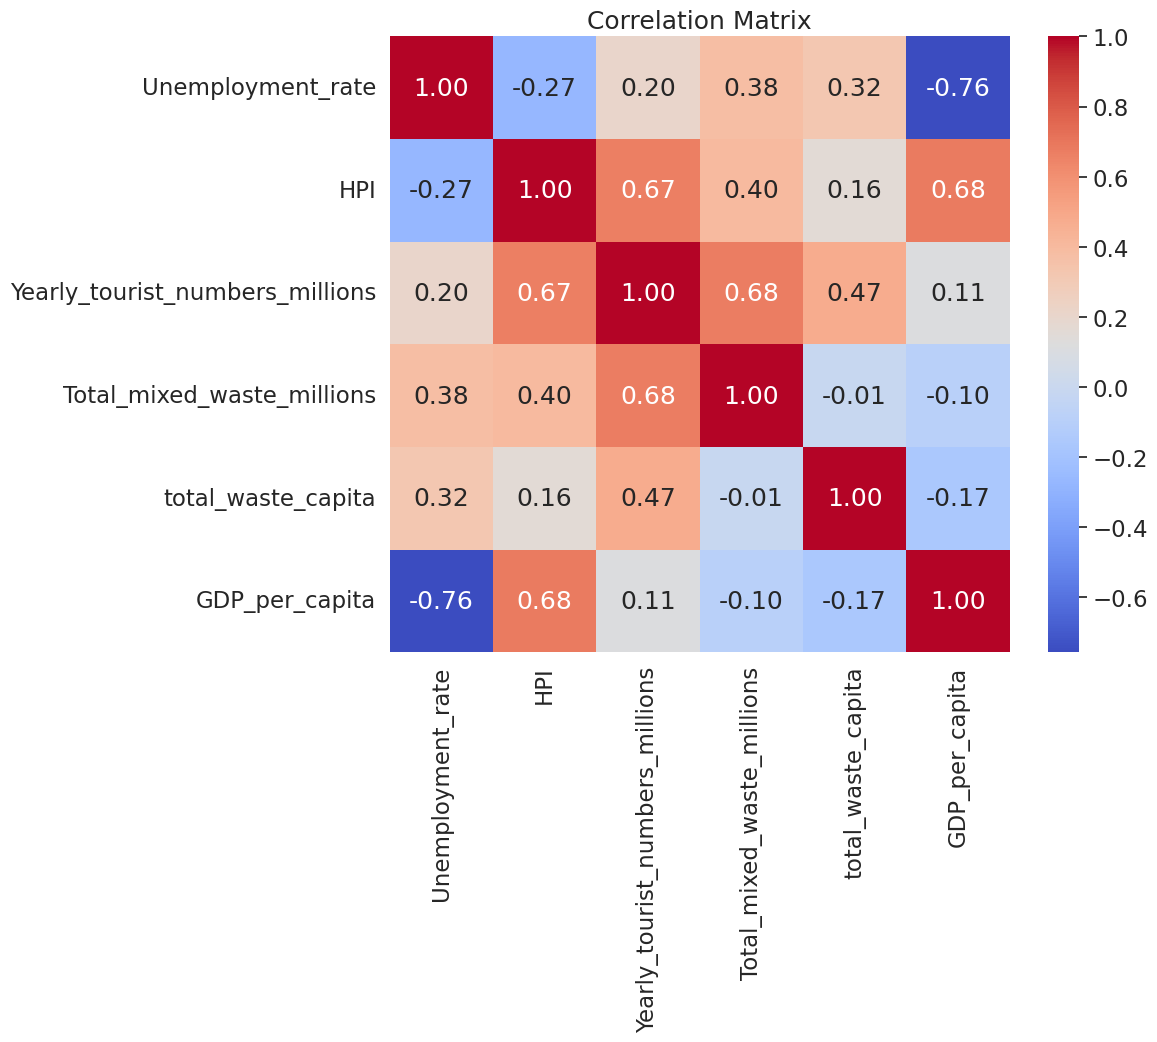

In [46]:
sns.heatmap(regression_df[['Unemployment_rate','HPI','Yearly_tourist_numbers_millions','Total_mixed_waste_millions', 'total_waste_capita', 'GDP_per_capita']].corr(), # plot a correlation matrix
            annot=True, # show the correlation values on the plot
            fmt=".2f", # set the format of the correlation values to be two decimal places
            cmap='coolwarm') # set the color palette to be coolwarm (blue for negative correlations, red for positive correlations)

plt.title('Correlation Matrix') # add a title

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i)
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')

        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)

        print('Max VIF:', vif_df.VIF.max())

        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [48]:
ind_vars=['Unemployment_rate','HPI','Total_mixed_waste_millions', 'total_waste_capita', 'GDP_per_capita']

vif = drop_column_using_vif_(regression_df[ind_vars], thresh=5)
print("The columns remaining after VIF selection are:")
print(vif.columns)

Max VIF: 5.982553973353087
Dropping: GDP_per_capita
Max VIF: 2.115960835358041
The columns remaining after VIF selection are:
Index(['Unemployment_rate', 'HPI', 'Total_mixed_waste_millions',
       'total_waste_capita'],
      dtype='object')


In [49]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

model= ols('Unemployment_rate ~  Yearly_tourist_numbers_millions', data=regression_df).fit() # fit the model
print(model.summary()) # print the summary

                            OLS Regression Results                            
Dep. Variable:      Unemployment_rate   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.6498
Date:                Sat, 18 Jan 2025   Prob (F-statistic):              0.433
Time:                        17:11:20   Log-Likelihood:                -49.942
No. Observations:                  17   AIC:                             103.9
Df Residuals:                      15   BIC:                             105.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [50]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

model= ols('HPI ~  Yearly_tourist_numbers_millions', data=regression_df).fit() # fit the model
print(model.summary()) # print the summary

                            OLS Regression Results                            
Dep. Variable:                    HPI   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     12.00
Date:                Sat, 18 Jan 2025   Prob (F-statistic):            0.00347
Time:                        17:13:01   Log-Likelihood:                -52.176
No. Observations:                  17   AIC:                             108.4
Df Residuals:                      15   BIC:                             110.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [53]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

model= ols('Total_mixed_waste_millions ~  Yearly_tourist_numbers_millions', data=regression_df).fit() # fit the model
print(model.summary()) # print the summary

                                OLS Regression Results                                
Dep. Variable:     Total_mixed_waste_millions   R-squared:                       0.458
Model:                                    OLS   Adj. R-squared:                  0.421
Method:                         Least Squares   F-statistic:                     12.65
Date:                        Sat, 18 Jan 2025   Prob (F-statistic):            0.00287
Time:                                17:16:11   Log-Likelihood:                -18.309
No. Observations:                          17   AIC:                             40.62
Df Residuals:                              15   BIC:                             42.28
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [51]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

model= ols('total_waste_capita ~  Yearly_tourist_numbers_millions', data=regression_df).fit() # fit the model
print(model.summary()) # print the summary

                            OLS Regression Results                            
Dep. Variable:     total_waste_capita   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     4.347
Date:                Sat, 18 Jan 2025   Prob (F-statistic):             0.0546
Time:                        17:15:03   Log-Likelihood:                -99.130
No. Observations:                  17   AIC:                             202.3
Df Residuals:                      15   BIC:                             203.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [54]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

model= ols('Unemployment_rate ~  Yearly_tourist_numbers_millions + GDP_per_capita', data=regression_df).fit() # fit the model
print(model.summary()) # print the summary

                            OLS Regression Results                            
Dep. Variable:      Unemployment_rate   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     13.46
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           0.000548
Time:                        17:18:28   Log-Likelihood:                -41.185
No. Observations:                  17   AIC:                             88.37
Df Residuals:                      14   BIC:                             90.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)
